# Classify spam texts using NLP and classification in PyCaret
An effective and time efficient method of implementing natural language processing together with machine learning classification algorithms. PyCaret, an open source machine learning library in Python to train and deploy supervised and unsupervised machine learning models in a low-code environment. PyCaret allows you to go from preparing data to deploying models within seconds from your choice of notebook environment.

PyCaret is a Python wrapper around several machine learning libraries and frameworks such as scikit-learn, XGBoost, Microsoft LightGBM, spaCy, and many more.
https://towardsdatascience.com/announcing-pycaret-an-open-source-low-code-machine-learning-library-in-python-4a1f1aad8d46

Here, I have used PyCaret to implement an classification of text messages with natural language processing. I have used the modules NLP and classification of PyCaret.

In [1]:
import pandas as pd 

In [2]:
df_flaggedtexts = pd.read_csv("./SMSdata/SMS_Spam_Ham.csv")

In [3]:
df_flaggedtexts

,Flag,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will Ã¼ b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...


In [4]:
#columns of the dataframe
df_flaggedtexts.columns 

Index(['Flag', 'SMS '], dtype='object')

In [5]:
df_flaggedtexts.rename(columns = {'SMS ':'SMS'}, inplace = True)

In [90]:
df_flaggedtexts.head()

,Flag,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ritwi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
from nltk.corpus import stopwords

In [9]:
#pre-existing stop words in the NLTK library
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [8]:
stop_words = stopwords.words('english')

PyCaret currently supports Topic Modelling embedding techniques only. In this example we will use the Latent Dirichlet Allocation(LDA) technique and the Non-Negative Matrix Factorization(NMF) technique for embedding.
Installation details: https://pypi.org/project/pycaret/

In [9]:
import pycaret
from pycaret.nlp import *

In [10]:
import spacy

In [11]:
# import en_core_web_sm
# nlp = en_core_web_sm.load()

In [12]:
nlp = spacy.load('en_core_web_sm')

## Data processing

The first step of any machine learning experiment in PyCaret is setting up the environment by importing the required module and initializing setup() 
https://pycaret.org/nlp/

In [13]:
init_1 = setup(data = df_flaggedtexts, target = 'SMS', custom_stopwords = stop_words)

Description,Value
session_id,1508
# Documents,5574
Vocab Size,4194
Custom Stopwords,True


## Embedding on the processed data

In [14]:
#Latent Dirichlet Allocation
lda1 = create_model(model='lda', multi_core=True)

In [97]:
# assigning LDA to a new dataframe
lda_data = assign_model(lda1)

In [98]:
lda_data.head()

,Flag,SMS,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic,Perc_Dominant_Topic
0,ham,go point crazy available get,0.330036,0.378334,0.249129,0.042502,Topic 1,0.38
1,ham,,0.250000,0.250000,0.250000,0.250000,Topic 0,0.25
2,spam,free entry wkly final may text receive entry q...,0.721648,0.018409,0.018226,0.241717,Topic 0,0.72
3,ham,say early hor already say,0.868673,0.042718,0.046134,0.042475,Topic 0,0.87
4,ham,go life around though,0.050442,0.052201,0.550583,0.346774,Topic 2,0.55


## Exploratory Data Visualization

In [17]:
plot_model(lda1)

In [18]:
plot_model(lda1, plot = "topic_distribution")

In [16]:
plot_model(lda1, plot = "tsne")

In [15]:
evaluate_model(lda1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Frequency Plot', 'freque…

In [100]:
#Non-Negative Matrix Factorization
nmf2 = create_model(model='nmf', multi_core=True)

In [103]:
nmf_data = assign_model(nmf2)

In [104]:
nmf_data.head()

,Flag,SMS,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic,Perc_Dominant_Topic
0,ham,go point crazy available get,0.000664,0.049583,0.002396,0.002883,Topic 1,0.89
1,ham,,0.000000,0.000000,0.000000,0.000000,Topic 0,NaN
2,spam,free entry wkly final may text receive entry q...,0.001406,0.000484,0.000686,0.001194,Topic 0,0.37
3,ham,say early hor already say,0.001594,0.003458,0.002559,0.004286,Topic 3,0.36
4,ham,go life around though,0.000000,0.059111,0.000000,0.000000,Topic 1,1.00


In [105]:
evaluate_model(nmf2)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Frequency Plot', 'freque…

## Model building

In [106]:
lda_data.columns

Index(['Flag', 'SMS', 'Topic_0', 'Topic_1', 'Topic_2', 'Topic_3',
       'Dominant_Topic', 'Perc_Dominant_Topic'],
      dtype='object')

In [107]:
lda_data.drop(['SMS', 'Dominant_Topic', 'Perc_Dominant_Topic'], axis=1, inplace = True)
lda_data.head()

,Flag,Topic_0,Topic_1,Topic_2,Topic_3
0,ham,0.330036,0.378334,0.249129,0.042502
1,ham,0.250000,0.250000,0.250000,0.250000
2,spam,0.721648,0.018409,0.018226,0.241717
3,ham,0.868673,0.042718,0.046134,0.042475
4,ham,0.050442,0.052201,0.550583,0.346774


In [ ]:
plot_model(lda1)

In [ ]:
plot_model(lda1, plot = "tsne")

In [108]:
nmf_data.columns

Index(['Flag', 'SMS', 'Topic_0', 'Topic_1', 'Topic_2', 'Topic_3',
       'Dominant_Topic', 'Perc_Dominant_Topic'],
      dtype='object')

In [109]:
nmf_data.drop(['SMS', 'Dominant_Topic', 'Perc_Dominant_Topic'], axis=1, inplace = True)
nmf_data.head()

,Flag,Topic_0,Topic_1,Topic_2,Topic_3
0,ham,0.000664,0.049583,0.002396,0.002883
1,ham,0.000000,0.000000,0.000000,0.000000
2,spam,0.001406,0.000484,0.000686,0.001194
3,ham,0.001594,0.003458,0.002559,0.004286
4,ham,0.000000,0.059111,0.000000,0.000000


## Model Building
This involves setting up the data, comparing models, creating and evaluating the models

In [110]:
from pycaret.classification import *

Experiment 1 is on the LDA data and Experiment 2 is on the NMF embedded data

In [111]:
exp_1 = setup(data = lda_data, target = 'Flag', session_id = 5, train_size = 0.80) #LDA data

 
Setup Succesfully Completed!


,Description,Value
0,session_id,5
1,Target Type,Binary
2,Label Encoded,"ham: 0, spam: 1"
3,Original Data,"(5574, 5)"
4,Missing Values,False
5,Numeric Features,4
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [112]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Random Forest Classifier,0.923700,0.883900,0.611900,0.773100,0.681500,0.639000
1,Light Gradient Boosting Machine,0.915200,0.900200,0.560100,0.748000,0.636400,0.590000
2,Extra Trees Classifier,0.914300,0.899300,0.620500,0.708400,0.659200,0.610600
3,CatBoost Classifier,0.913200,0.899800,0.526700,0.756600,0.616600,0.569800
4,Gradient Boosting Classifier,0.908100,0.892500,0.454700,0.767200,0.565000,0.518100
5,Extreme Gradient Boosting,0.902200,0.885500,0.401100,0.760400,0.518600,0.470800
6,Decision Tree Classifier,0.894600,0.782100,0.650600,0.598800,0.622600,0.561600
7,Ada Boost Classifier,0.887400,0.868200,0.396100,0.635000,0.484200,0.425100
8,K Neighbors Classifier,0.885600,0.835800,0.428000,0.608000,0.499700,0.437600
9,Logistic Regression,0.865900,0.751900,0.000000,0.000000,0.000000,0.000000


## Hyperparameter tuning

In [113]:
exp1_m1 = create_model('rf') #using rf because it performed best when comparing all the models

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9148,0.8390,0.5254,0.7561,0.6200,0.5738
1,0.9260,0.8540,0.6167,0.7872,0.6916,0.6503
2,0.9148,0.8614,0.5500,0.7500,0.6346,0.5877
3,0.9439,0.9123,0.7333,0.8302,0.7788,0.7468
4,0.9350,0.8607,0.6333,0.8444,0.7238,0.6878
5,0.9058,0.8717,0.5833,0.6731,0.6250,0.5715
6,0.9148,0.9044,0.5667,0.7391,0.6415,0.5941
7,0.9260,0.8831,0.5667,0.8293,0.6733,0.6332
8,0.9350,0.9441,0.7167,0.7818,0.7478,0.7106
9,0.9213,0.9077,0.6271,0.7400,0.6789,0.6344


In [115]:
tuned_exp1_m1 = tune_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9170,0.9150,0.5424,0.7619,0.6337,0.5884
1,0.9193,0.8550,0.6333,0.7308,0.6786,0.6327
2,0.9148,0.8623,0.5500,0.7500,0.6346,0.5877
3,0.9395,0.9264,0.7333,0.8000,0.7652,0.7305
4,0.9283,0.8900,0.6000,0.8182,0.6923,0.6528
5,0.9193,0.8805,0.6167,0.7400,0.6727,0.6271
6,0.9215,0.9263,0.6000,0.7660,0.6729,0.6291
7,0.9417,0.8818,0.6833,0.8542,0.7593,0.7266
8,0.9148,0.9293,0.6833,0.6833,0.6833,0.6341
9,0.9326,0.9127,0.7288,0.7544,0.7414,0.7026


In [117]:
evaluate_model(tuned_exp1_m1) #interactive plots!

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

Experiment 2: Repeating the same steps for the NMF embedded data

In [118]:
exp_2 = setup(data = nmf_data, target = 'Flag', session_id = 5, train_size = 0.80)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,5
1,Target Type,Binary
2,Label Encoded,"ham: 0, spam: 1"
3,Original Data,"(5574, 5)"
4,Missing Values,False
5,Numeric Features,4
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [34]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extra Trees Classifier,0.935900,0.941900,0.665400,0.823400,0.734800,0.698900
1,Light Gradient Boosting Machine,0.932700,0.931900,0.690600,0.787600,0.733800,0.695600
2,Random Forest Classifier,0.929400,0.916000,0.638600,0.795900,0.707600,0.668000
3,CatBoost Classifier,0.928500,0.929200,0.620400,0.804000,0.698700,0.658900
4,Gradient Boosting Classifier,0.916100,0.915600,0.526800,0.779000,0.626000,0.580900
5,Extreme Gradient Boosting,0.913000,0.914600,0.501600,0.774800,0.606200,0.560000
6,Decision Tree Classifier,0.911400,0.808800,0.689000,0.666100,0.676300,0.625100
7,Ada Boost Classifier,0.907800,0.903600,0.496600,0.734600,0.590900,0.541200
8,K Neighbors Classifier,0.902400,0.886600,0.560000,0.664700,0.605700,0.550700
9,Logistic Regression,0.865900,0.783900,0.000000,0.000000,0.000000,0.000000


In [66]:
exp2_m1 = create_model('lightgbm') #tried using the second best model

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9327,0.9389,0.6610,0.7959,0.7222,0.6843
1,0.9126,0.9120,0.6167,0.6981,0.6549,0.6050
2,0.9170,0.9134,0.6000,0.7347,0.6606,0.6138
3,0.9417,0.9575,0.7667,0.7931,0.7797,0.7461
4,0.9417,0.9215,0.7333,0.8148,0.7719,0.7386
5,0.9238,0.9324,0.7000,0.7241,0.7119,0.6680
6,0.9305,0.9514,0.7833,0.7231,0.7520,0.7117
7,0.9215,0.8965,0.6333,0.7451,0.6847,0.6402
8,0.9462,0.9516,0.6833,0.8913,0.7736,0.7437
9,0.9596,0.9438,0.7288,0.9556,0.8269,0.8045


In [68]:
tuned_exp2_m1 = tune_model('lightgbm') #, optimize='AUC'

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9372,0.9256,0.6441,0.8444,0.7308,0.6960
1,0.9170,0.9059,0.6333,0.7170,0.6726,0.6253
2,0.9193,0.9001,0.6333,0.7308,0.6786,0.6327
3,0.9507,0.9573,0.7667,0.8519,0.8070,0.7788
4,0.9439,0.9293,0.7500,0.8182,0.7826,0.7505
5,0.9215,0.9362,0.6833,0.7193,0.7009,0.6557
6,0.9417,0.9561,0.8333,0.7576,0.7937,0.7598
7,0.9193,0.8957,0.6333,0.7308,0.6786,0.6327
8,0.9439,0.9546,0.6833,0.8723,0.7664,0.7350
9,0.9528,0.9446,0.7119,0.9130,0.8000,0.7737


In [69]:
boosted_exp2_m1 = ensemble_model(tuned_exp2_m1) #could use method = "Boosting"

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9327,0.9253,0.6102,0.8372,0.7059,0.6690
1,0.9193,0.9118,0.6000,0.7500,0.6667,0.6214
2,0.9170,0.8981,0.6000,0.7347,0.6606,0.6138
3,0.9372,0.9565,0.6833,0.8200,0.7455,0.7100
4,0.9350,0.9254,0.6833,0.8039,0.7387,0.7019
5,0.9305,0.9394,0.7000,0.7636,0.7304,0.6906
6,0.9417,0.9563,0.7667,0.7931,0.7797,0.7461
7,0.9170,0.8967,0.5833,0.7447,0.6542,0.6079
8,0.9417,0.9476,0.6333,0.9048,0.7451,0.7133
9,0.9438,0.9401,0.6102,0.9474,0.7423,0.7124


In [70]:
evaluate_model(boosted_exp2_m1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

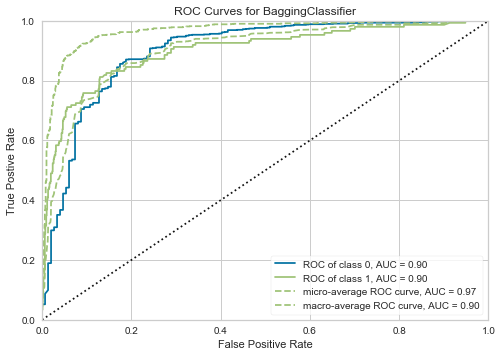

In [71]:
# AUC plot
plot_model(boosted_exp2_m1, plot = 'auc')

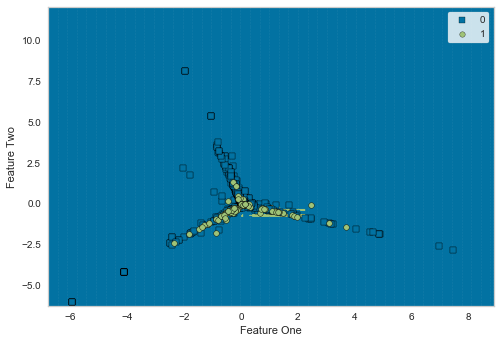

In [72]:
# Decision Boundary
plot_model(boosted_exp2_m1, plot = 'boundary')

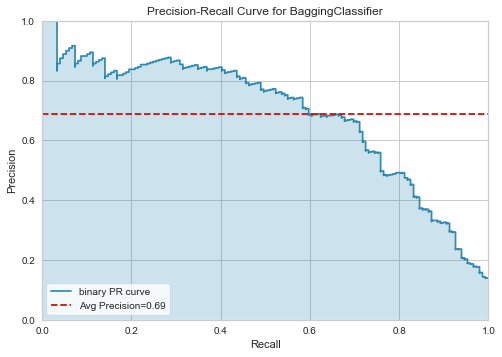

In [73]:
# Precision Recall Curve
plot_model(boosted_exp2_m1, plot = 'pr')

In [75]:
# # Validation Curve
# plot_model(boosted_pce_2_m1, plot = 'vc')
boosted_exp2_m1

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.2, max_depth=100,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.1,
               n_estimators=70, n_jobs=-1, num_leaves=50, objective=None,
               random_state=5, reg_alpha=0.3, reg_lambda=0.5, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

When the relationship in data is non-linear which is often the case in real life we invariably see tree-based models doing much better than simple gaussian models. However, this comes at the cost of losing interpretability as tree-based models do not provide simple coefficients like linear models. PyCaret implements SHAP (SHapley Additive exPlanations using interpret_model function.

In [82]:
#interpret_model(boosted_pce_2_m1, plot = 'correlation')
#interpret_model(boosted_pce_2_m1, plot = 'reason', observation = 0) 

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9170,0.9325,0.4915,0.8056,0.6105,0.5671
1,0.9103,0.9020,0.5000,0.7500,0.6000,0.5518
2,0.8946,0.8828,0.4167,0.6757,0.5155,0.4600
3,0.9148,0.9426,0.4833,0.8056,0.6042,0.5597
4,0.9193,0.8983,0.5667,0.7727,0.6538,0.6094
5,0.9058,0.9129,0.5000,0.7143,0.5882,0.5369
6,0.9148,0.9387,0.6167,0.7115,0.6607,0.6123
7,0.9013,0.8743,0.4167,0.7353,0.5319,0.4815
8,0.9238,0.9431,0.5333,0.8421,0.6531,0.6126
9,0.9281,0.9189,0.4915,0.9355,0.6444,0.6087


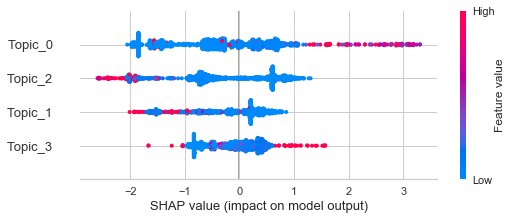

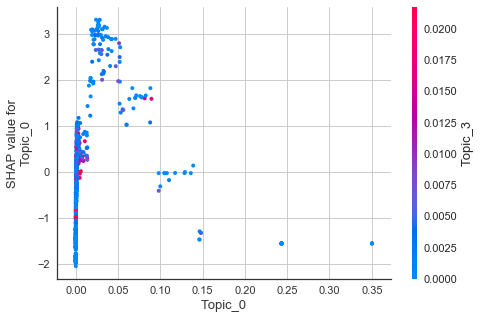

In [83]:
# create a model
xgboost = create_model('xgboost')
# summary plot
interpret_model(xgboost)
# correlation plot
interpret_model(xgboost, plot = 'correlation')
interpret_model(xgboost, plot = 'reason', observation = 0) 

## Predict model  
In order to see the predictions and performance of the model on the test / hold-out dataset, the predict_model function is used. predict_model function is also used to predict unseen dataset.

In [ ]:
# create a model
xgboost = create_model('xgboost')
# predict test / hold-out dataset
rf_holdout_pred = predict_model(xgboost)
predictions = predict_model(xgboost, data = nmf_data)

## Deploy model
PyCaret’s deploy_model function allows deploying the entire pipeline including trained model on cloud from notebook environment.

In [ ]:
deploy_model(model = xgboost, model_name = 'xgboost_aws', platform = 'aws', 
             authentication =  {'bucket'  : 'pycaret-test'})